<center>
    <img src="https://ilic.cl/wp-content/uploads/2021/04/JOSE-ILIC_Mesa-de-trabajo-1-copia-14-e1619050976379-1024x254.png" width="300" alt="Logo Jose Ilic"  />
</center>


# Class 5: Data Visualization 2

This class will cover how to visualize data with bubbles, maps, wordclouds, regression graphs and waffle charts.

## Data and Libraries

### Libraries

We will use matplotlib, pandas, numpy, wordcloud, PIL, urllib and seaborn. It is also necessary to install wordcloud.

In [ ]:
! pip3 install wordcloud

In [ ]:
! pip3 install nltk

In [11]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the waffle Charts
import numpy as np
import pandas as pd
from PIL import Image # Conver images into arrays 
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from six.moves import urllib

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the data and working on it a bit

For this exercise we are going to use a UN immigration database. Before we can start we need to work on the data a bit in order to be able to plot.

Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision of the UN website.

To prepare the data we will need Pandas and Numpy

In [15]:
# Importamos datos
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and added to the DF!')

Data downloaded and added to the DF!


In [16]:
# Limpiamos datos borrando columnas inútiles
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Renombramos columnas
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Hacemos que todas las columnas sean de tipo string
df_can.columns = list(map(str, df_can.columns))

# Hacemos que los países sean el index del DF
df_can.set_index('Country', inplace=True)

# Añadimos columna 'Total'
df_can['Total'] = df_can.sum(axis=1)

# Finalmente creamos una lista de años desde 1980 al 2013 <-- útil para algunos plots
years = list(map(str, range(1980, 2014)))

<ipython-input-16-3cd796b577d3>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [8]:
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


## Lets Visualize

### Bubble Plots

A `bubble plot` is a variation of a `scatter plot` that shows three dimensions of data (x,y,z). The points are replaced by bubbles, and the size of the bubbles is determined by the third variable `z`, also known as the weight. In `maplotlib` we can pass an array or scale to the `s` parameter to `plot()`, which contains the weight of each point.

**Let's start by analyzing the effect of the great depression in Argentina**.

Argentina had a great crisis in 2002, let's compare Argentine and Brazilian immigration. For this we will set all the weights of the bubbles to the normalized value of the population of each year.

#### 1rst Step

Get the data for Brazil and Argentina. We will also convert the `years` to integer type and include it in the DataFrame.

In [9]:
# Transposed DataFrame
df_can_t = df_can[years].transpose()

# Years as (index) type (int)
df_can_t.index = map(int, df_can_t.index)

# Name the index. This will be the name of the column when we reset the index
df_can_t.index.name = 'Year'

# Reset the index to transform years into column
df_can_t.reset_index(inplace=True)

# Check results
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


#### Step 2

Getting the normalized weights.

There are several normalization methods in statistics, each with its own use. In this case, we are going to use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values ​​into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

Where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the maximum value of the data to 1 and the minimum to 0. The rest of the values ​​are scaled between 0 and 1 logically.

In [10]:
# Normalize Brasilean data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# Normalize Argentinean data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

#### Step 3

Plotting the data

* To plot two scatter plots in a single graph, we need to include the axes of one within the other by passing it via the `ax` parameter.
* We will also need to pass the weights using the `s` parameter. Since the weights are normalized between 0 and 1, they will not be visible in the plot. Therefore we will need to:
* Multiply the weights by 2000 to scale them
* Add 10 to offset the minimum value so that it can be scaled.

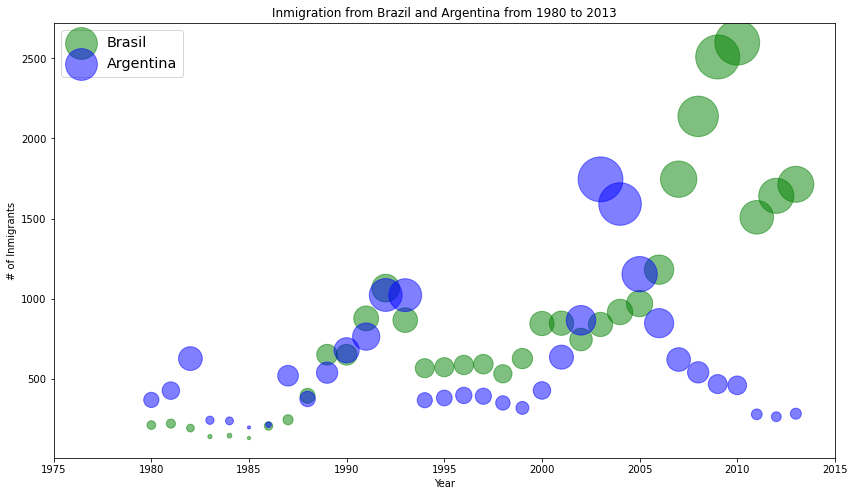

In [11]:
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # weights
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('# of Inmigrants')
ax0.set_title('Inmigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the size of the immigrant population for that year compared to the data from 1980-2013. The more immigrants that year, the bigger the bubble.

From the graph above we can see an increase in immigration from Argentina during the years 1998-2002, which was the big crisis. We can also see a similar increase during 1985-1993. In fact, Argentina suffered a great depression from 74 to 90.

On a similar note, Brazil suffered the *Samba Effect*, where the real (the currency) fell by almost 35% in 1999. Brazil adopted an austerity program in order to slowly recover its economy until a big boom in 2010.

### Waffle Charts

A `waffle chart` is an interesting visualization that is usually created to show progress towards certain goals. However, Python does not have a tool built in for this type of chart. So we are going to build it here!

For this we will need 7 steps and data to work with. For the data we will use immigration to Canada from Denmark, Norway and Sweden

In [21]:
#Getting the data from France, Japan and Egypt
df_dsn = df_can.loc[['France', 'Japan', 'Egypt'], :]


#### Step 1
The first thing is to determine the proportion of each category with respect to the total.

In [22]:
total_values = df_dsn['Total'].sum() # Get the total
category_proportions = df_dsn['Total'] / total_values #We get the proportion of each country "category"

pd.DataFrame({"Category Proportion": category_proportions}) #We pass the values of each category to a DataFrame

,Category Proportion
Country,
France,0.520614
Japan,0.132226
Egypt,0.347160


#### Step 2

Define size of our `Waffle`

In [23]:
width = 40 
height = 10

total_num_tiles = width * height #Total number of tiles (how many squares)

print(f'Total number of tiles: {total_num_tiles}.')

Total number of tiles: 400.


#### Step 3

The third step is to determine the proportion of each category to assign the number of tiles

In [24]:
# Calculate number of tiles per category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# Print number of tiles per category
pd.DataFrame({"# of tiles": tiles_per_category})

,# of tiles
Country,
France,208
Japan,53
Egypt,139


#### Step 4

Create an array that looks like a waffle and fill it with the calculated values

In [26]:
# Start the waffle as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices that will loop on the waffle
category_index = 0
tile_index = 0

# fill up the waffle
for col in range(width):
    for row in range(height):
        tile_index += 1

        # If the number of tiles for the category is equal to the number of tiles in this category...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ... we go to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart is filled')

Waffle chart is filled


In [27]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#### Step 5

Mapeamos el `waffle` a una visualización

<Figure size 432x288 with 0 Axes>

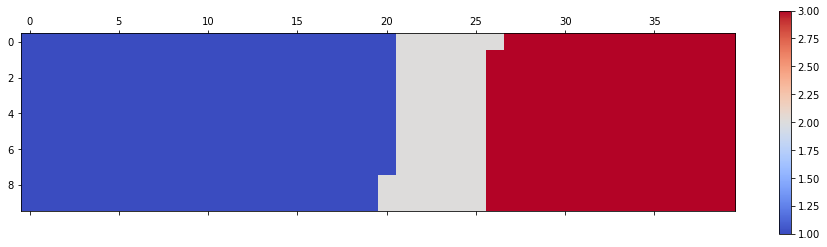

In [28]:
# Start a figure object
fig = plt.figure()

# Use matshow to show the waffle
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

#### Step 6

Lets make it nice

<Figure size 432x288 with 0 Axes>

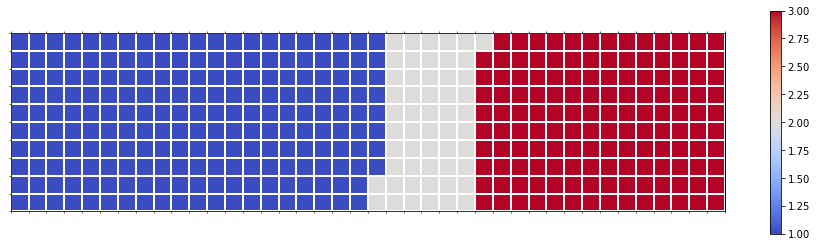

In [29]:
# The figure object once again
fig = plt.figure()

# Use matshow to show the waffle
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# make ticks smaller
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add guide lines based on ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

#### Step 7

Create leyend and add to plot

<Figure size 432x288 with 0 Axes>

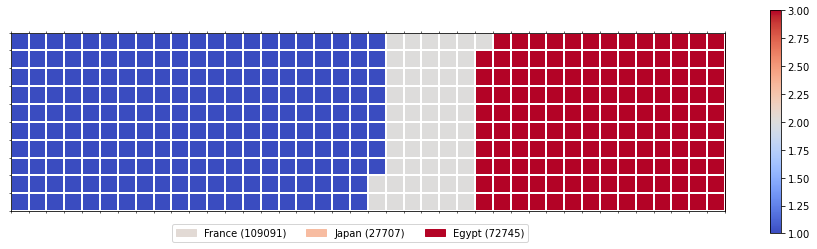

In [38]:
# The figure object once again
fig = plt.figure()

# Use matshow to show the waffle
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# make ticks smaller
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add guide lines based on ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# Calculate the cumulative sum for each category to make the colors match 
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum)-1]

# create leyend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add leyend.
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#### Step 8

It would be super inefficient to do this every time we make a `waffle`, so step 8 will just be tying all of this together in one function. The function will be called `create_waffle_chart` and will take the following values as input:

> 1. **categories**: Unique categories or classes in a DataFrame.
> 2. **values**: Values corresponding to the categories or classes.
> 3. **height**: Height of the chart.
> 4. **width**: Width of the chart.
> 5. **colormap**: Colormap class
> 6. **value_sign**: In order to make our function more generalizable, we will add this parameter to handle possible signs that may appear such as %, $, etc. **value_sign** has an empty default value.

In [45]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # calculate proportion of category from total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # Calculate number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Número de baldosas total es ', total_num_tiles)
    
    # Tiles per category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # Print number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # Start waffle as empty matrix
    waffle_chart = np.zeros((height, width))

    # Define indices for waffle loop
    category_index = 0
    tile_index = 0

    # Fill the waffle
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # If the number of filled tiles for the current category
            # is equal to the assigned tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ... continue to the next category
                category_index += 1       
            
            # set the class value as a integer that goes up with the class
            waffle_chart[row, col] = category_index
    
    # Start figure
    fig = plt.figure()

    # matshow to view the waffle
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get axis
    ax = plt.gca()

    # smaller ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add grid lines by ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # We calculate the cumulative sum of the individual categories to fit the colors and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create leyend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add leyend
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [41]:
width = 60 #
height = 20 # 

categories = df_dsn.index.values # 
values = df_dsn['Total'] # 

colormap = plt.cm.coolwarm # colormap class

Número de baldosas total es  1200
France: 625
Japan: 159
Egypt: 417


<Figure size 432x288 with 0 Axes>

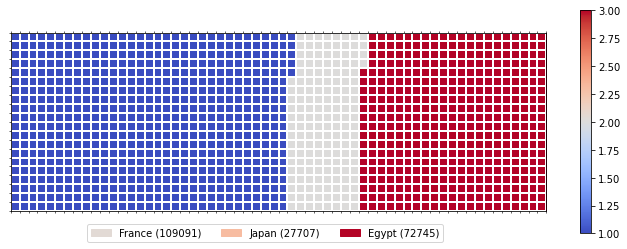

In [46]:
create_waffle_chart(categories, values, height, width, colormap)

Parece haber un nuevo paquete de Python para generar `gráficos waffle` llamado [PyWaffle](https://github.com/ligyxy/PyWaffle), pero parece que aún está siendo construido. 

In [47]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos.


### Word Cloud

`Word clouds` (AKA text clouds, or tag clouds work in a very simple way: the more times a specific word appears in a text data source, the larger and thicker it will appear in the word cloud.

Luckily, a Python package already exists, called `word_cloud`. It was developed by **Andreas Mueller**.
For more information, visit this [link](https://github.com/amueller/word_cloud/).

Word clouds are commonly used for high-level data analysis and visualization. To work with this tool, we are going to move away from the Canadian immigration database. Instead, we are going to use a short novel by Lewis Carroll: Alice in Wonderland. We will need the .txt file of the novel.

In [1]:
# Open and read the file in the variable alice_novel
alice_novel = open('Carroll_Lewis_Alicia.txt' ,'r').read()

In [6]:
# Define words 
stop_words_sp = stopwords.words('english')
stop_eng = set(STOPWORDS)

In [7]:
# Start a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=4000,
    stopwords=stop_words_sp
)

# generate the cloud
alice_wc.generate(alice_novel)

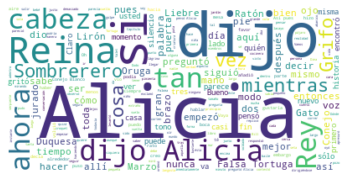

In [128]:
# Ahora veamos la nube!
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Lets work that image

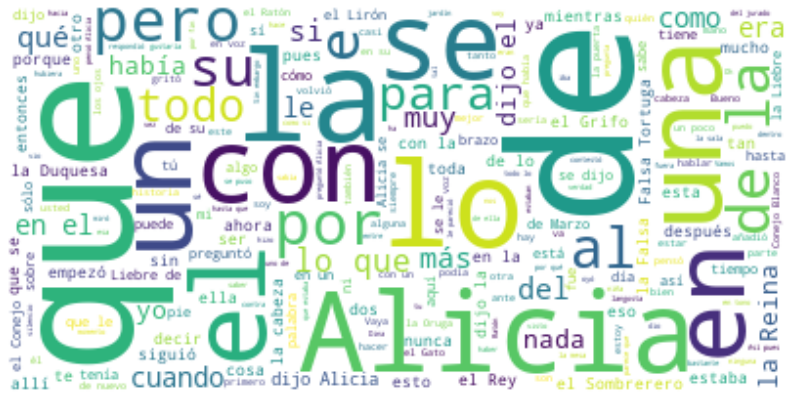

In [8]:
# Make it bigger
fig = plt.figure(figsize=(14, 18))

# Show the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

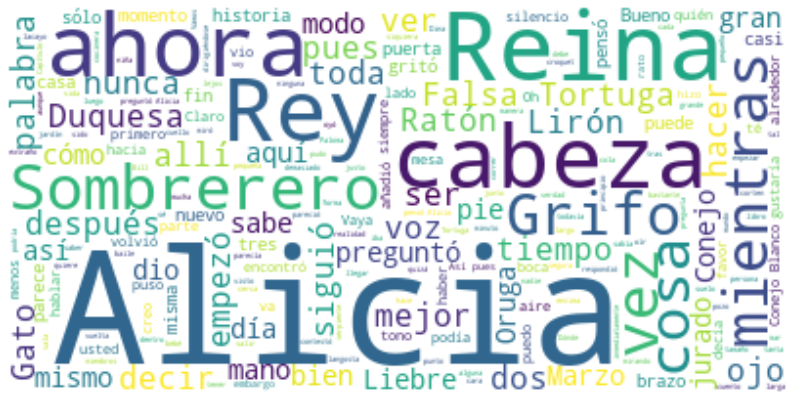

In [130]:
# Hay algunas palabas innecarias así que las vamos a eliminar
# stopwords.add('dijo','si','tan','entonces') # Añade palabras a stopwrods (de wordcloud) 
nuevas_palabras= ['dijo','si','tan','entonces'] # Añade palabras a stopwrods (de nltk)
stop_words_sp.extend(nuevas_palabras)

# re-generamos la nube
alice_wc.generate(alice_novel)

# mostramos la nube
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Lets add a mask

Excellent! One interesting thing you can do with the `word_cloud` package is to overlay words on a mask.

In [12]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

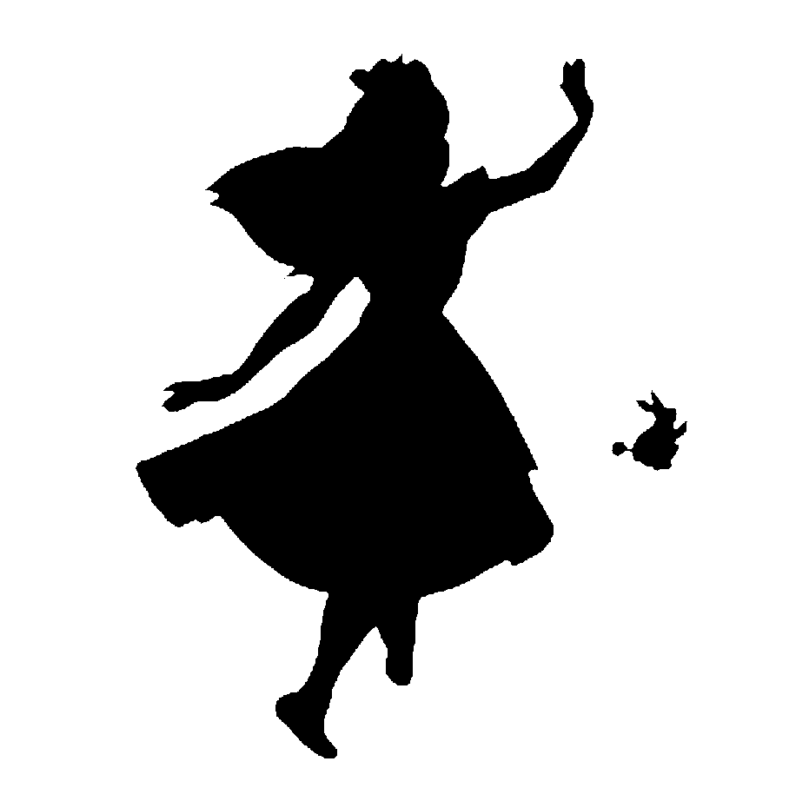

In [13]:
# Lets see the mask
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

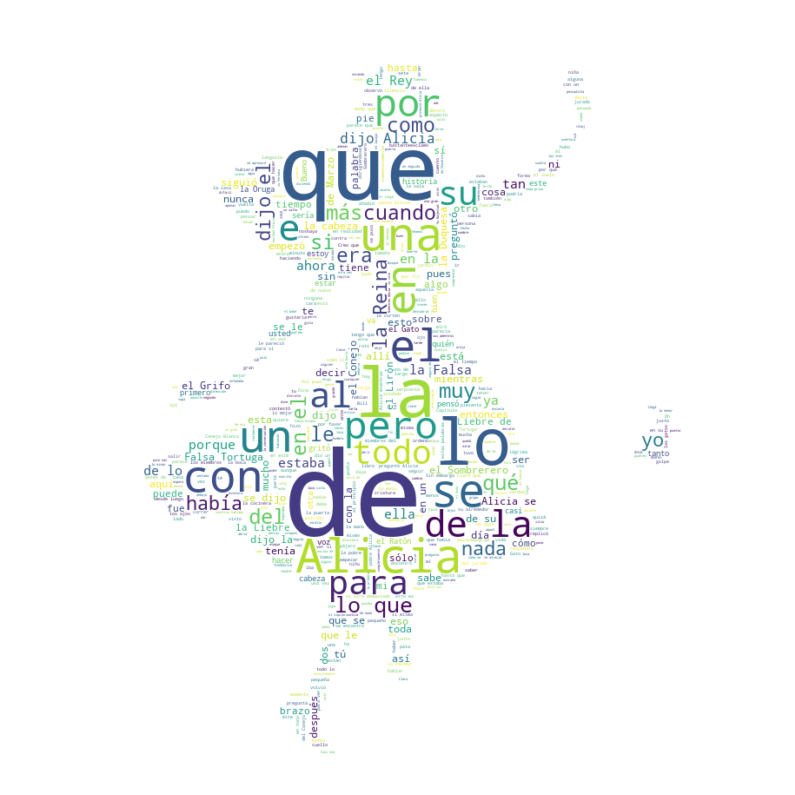

In [14]:
# Lets combine!
# Start a wordcloud object
alice_wc = WordCloud(background_color='white', max_words=6000, mask=alice_mask, stopwords=stop_words_sp)

# generate the cloud
alice_wc.generate(alice_novel)

# show the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Word Cloud +

We can reinterpret the use of `word_cloud` by converting numbers to words, for this we will use our Canadian immigration database again.

In [17]:
# Calculemos la suma total de inmigración a Canadá entre 1980 y 2013
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [18]:
max_words = 500
word_string = ''
for country in df_can.index.values:
    # we check if the name of the country is a word or not.
    if country.count(" ") == 0:
#         print(df_can.loc[country, 'Total'])
#         print(total_immigration*max_words)
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
#         print(repeat_num_times)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'Afghanistan Afghanistan Afghanistan Afghanistan Albania Algeria Algeria Algeria Algeria Algeria Argentina Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Brazil Brazil Bulgaria Cameroon Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Colombia Colombia Colombia Colombia Colombia Cuba Egypt Egypt Egypt Egypt Egypt Ethiopia Ethiopia Fiji France France France France France France France France Germany Germany Germany Germany Ghana Ghana Guatemala Guyana Guyana Guyana Guyana Guyana Haiti Haiti Haiti Haiti Haiti Haiti Hungary India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India India 

We're not dealing with stop words here, so there's no need to pass the parameter.

In [20]:
# create the cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


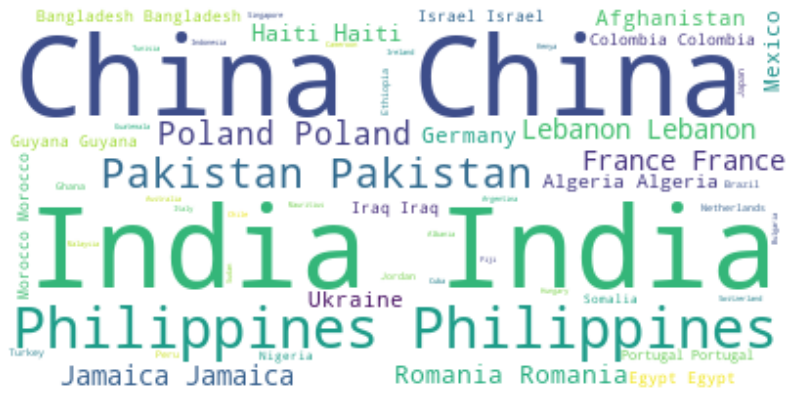

In [21]:
# Show the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression Plots

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical plots. You can learn more about *seaborn* at this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots at this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

We previously learned how to make various types of graphs and how to fit a regression curve to them. It took something like 20 lines. *Seaborn* allows us to substantially reduce that number of lines.

#### Data

We create a dataframe that saves the total inmigration per year

In [22]:
# Use sum() method to obtain total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# We change the type of the years to float (useful for the regression later)
df_tot.index = map(float, df_tot.index)

# We reset the index to put it as a column in the new df
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# show results
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


#### Plots

<AxesSubplot:xlabel='year', ylabel='total'>

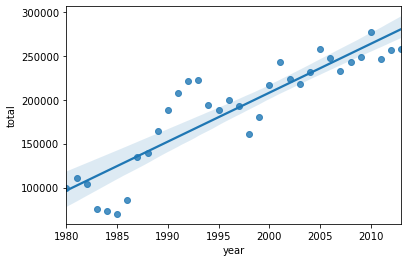

In [23]:
# Get the plot with seaborn
sns.regplot(x='year', y='total', data=df_tot)

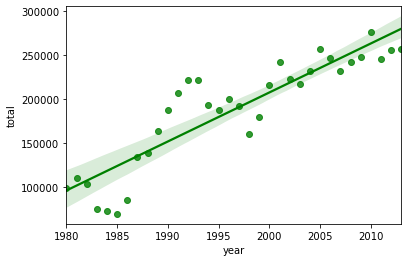

In [24]:
# now in green!
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

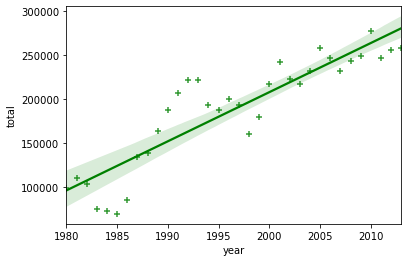

In [25]:
# change markers to +
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

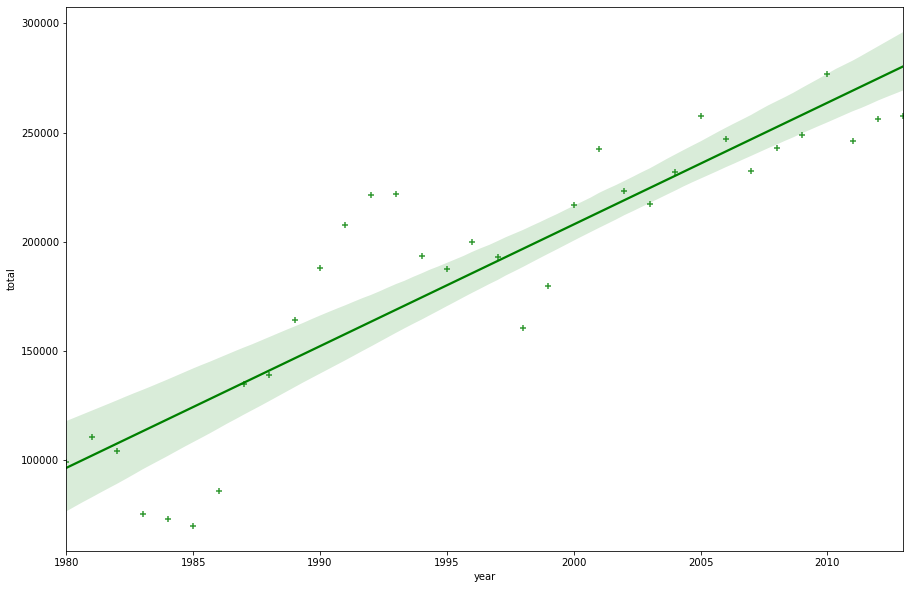

In [26]:
# Naturlich you can make it bigger
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

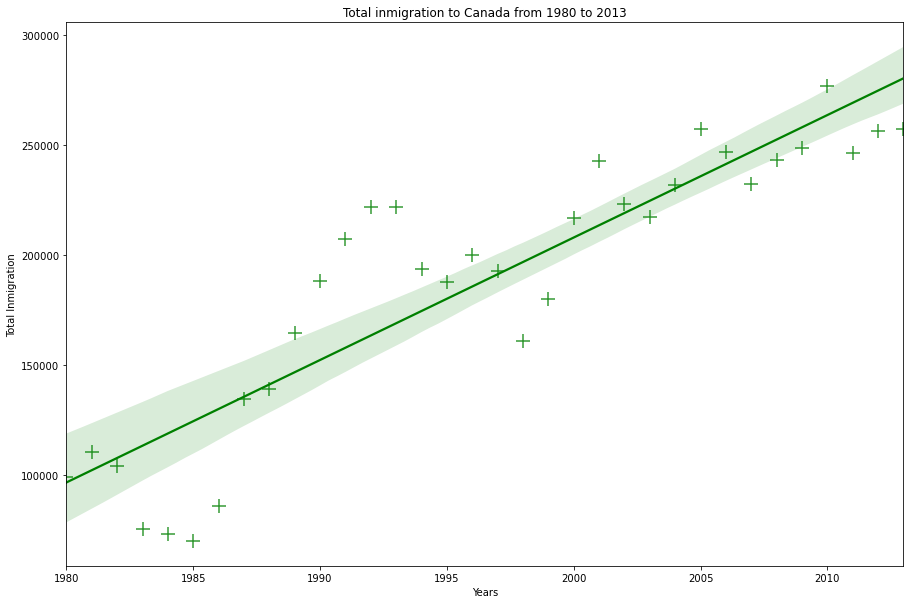

In [28]:
# bigger markers and titles
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Years', ylabel='Total Inmigration') # names for X and Y
ax.set_title('Total inmigration to Canada from 1980 to 2013') # add title
plt.show()

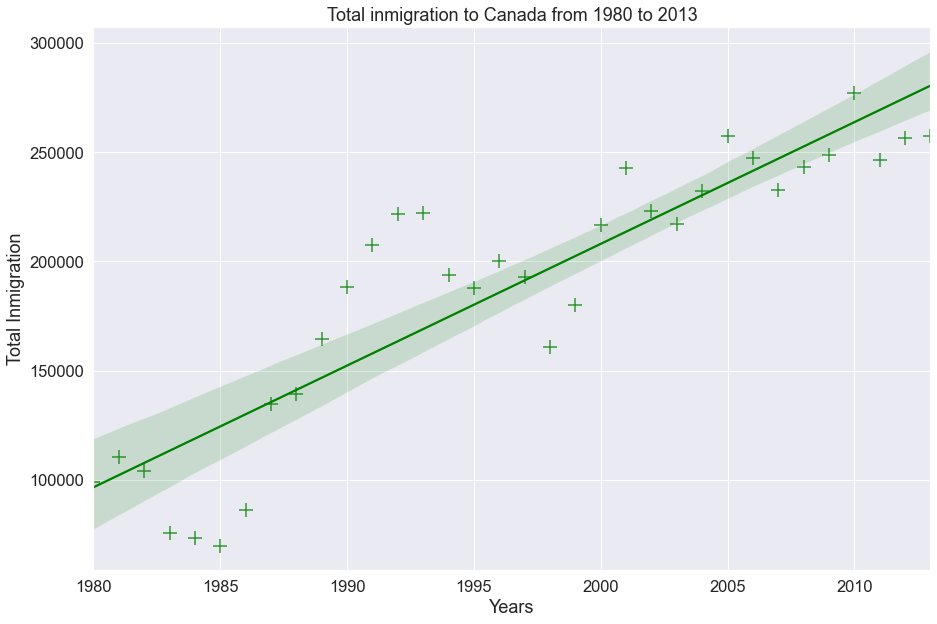

In [29]:
# Lets change font size

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Years', ylabel='Total Inmigration') # names for X and Y
ax.set_title('Total inmigration to Canada from 1980 to 2013') # add title
plt.show()

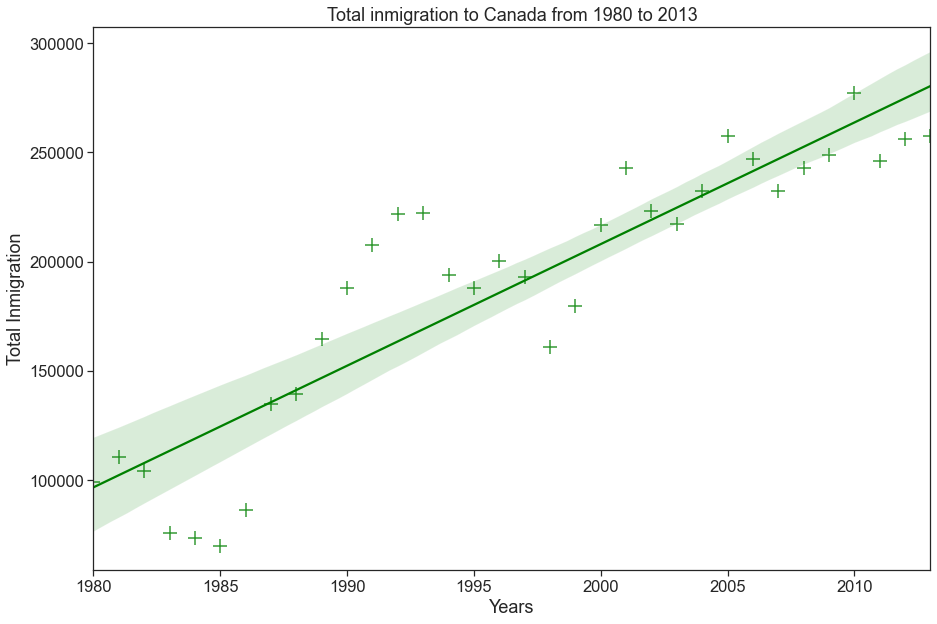

In [31]:
# Lets take out that ugly purple background

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background color

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Years', ylabel='Total Inmigration') # names for X and Y
ax.set_title('Total inmigration to Canada from 1980 to 2013') # add title
plt.show()

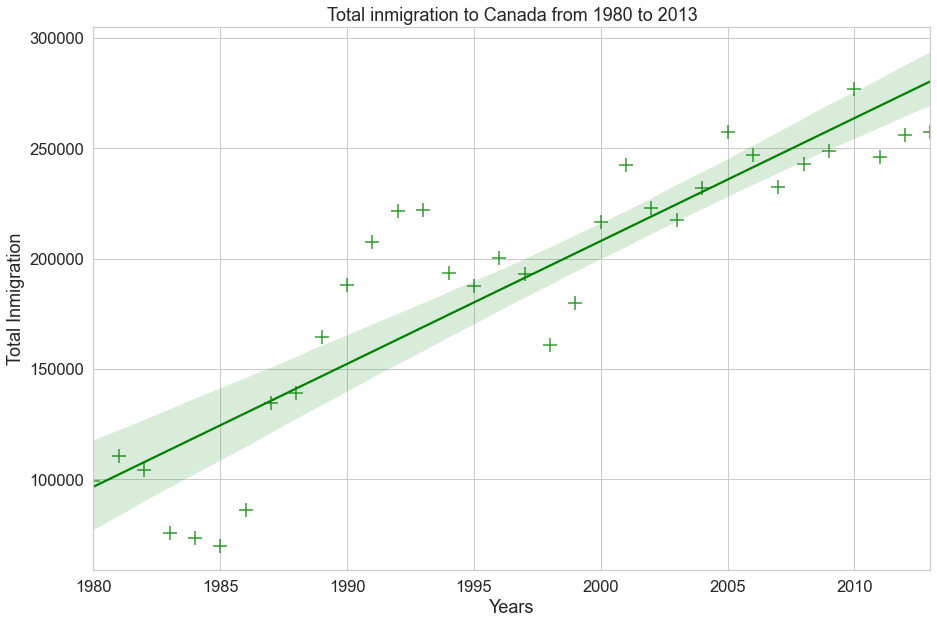

In [32]:
# Did you like the lines?


plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')  # change background color

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Years', ylabel='Total Inmigration') # names for X and Y
ax.set_title('Total inmigration to Canada from 1980 to 2013') # add title
plt.show()